In [ ]:
!pip install keras

In [ ]:
!pip install style

In [ ]:
import style
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [ ]:
# Documentation
## Pandas
## Pandas is mainly used for machine learning in form of dataframes. Pandas allow importing data of various file formats such as csv, excel etc. Pandas allows various data manipulation operations such as groupby, join, merge, melt, concatenation as well as data cleaning features such as filling, replacing or imputing null values.

## Matplotlib
## Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

## Plotly
## Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how  to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

## Seaborn
## Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [ ]:
from google.colab import files
uploaded = files.upload()
Input_Data = pd.read_csv("rainfall in india 1901-2015.csv")
Input_Data = Input_Data.fillna(Input_Data.mean())
Input_Data.info()
Input_Data.head()
Input_Data.describe()


Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      411

YEAR          JAN  ...      Jun-Sep      Oct-Dec
count  4116.000000  4116.000000  ...  4116.000000  4116.000000
mean   1958.218659    18.957320  ...  1064.724769   154.100487
std      33.140898    33.569044  ...   706.881054   166.678751
min    1901.000000     0.000000  ...    57.400000     0.000000
25%    1930.000000     0.600000  ...   574.375000    34.200000
50%    1958.000000     6.000000  ...   882.250000    98.800000
75%    1987.000000    22.125000  ...  1287.550000   212.600000
max    2015.000000   583.700000  ...  4536.900000  1252.500000

[8 rows x 18 columns]

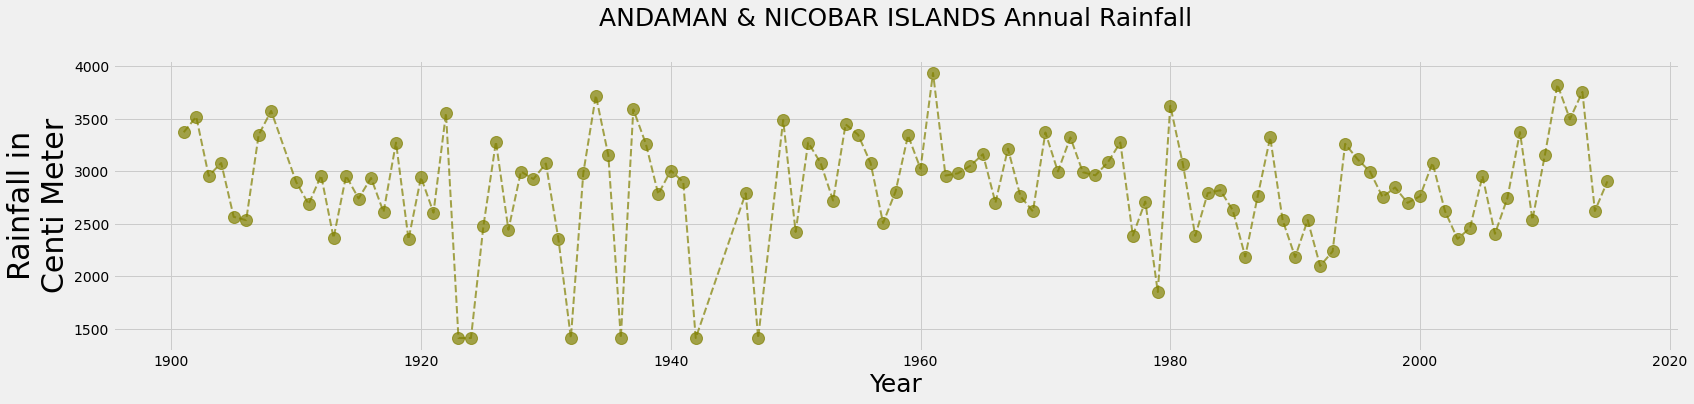

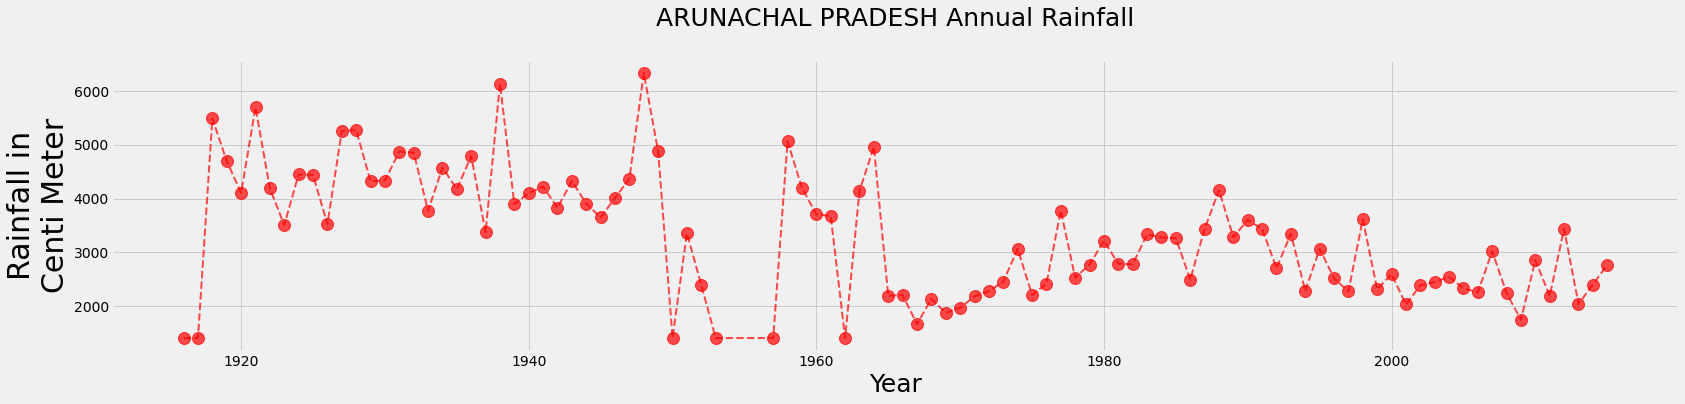

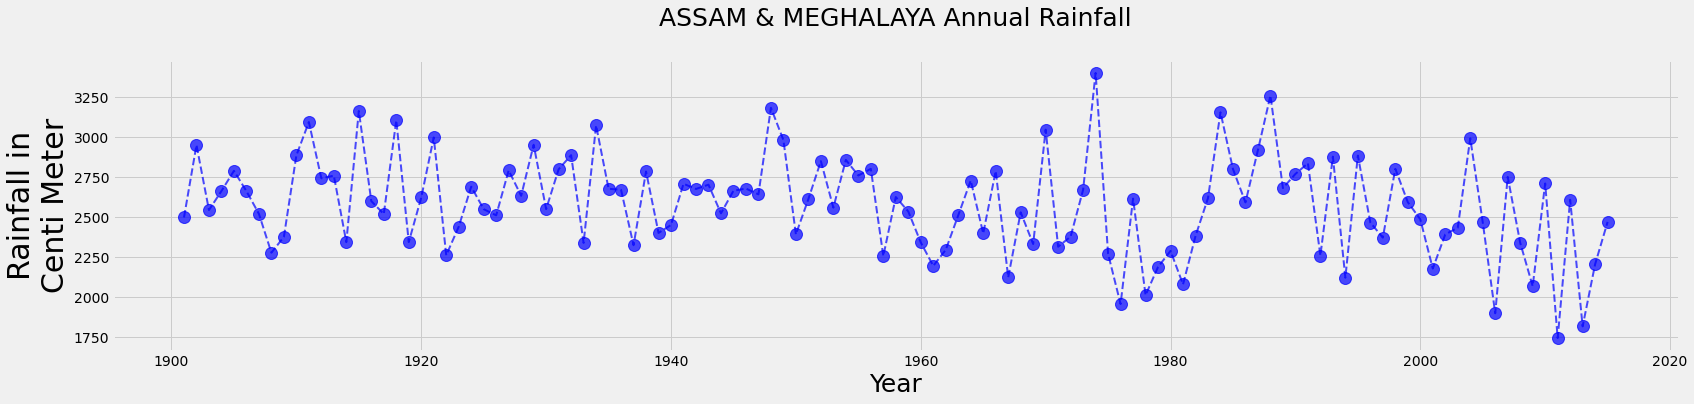

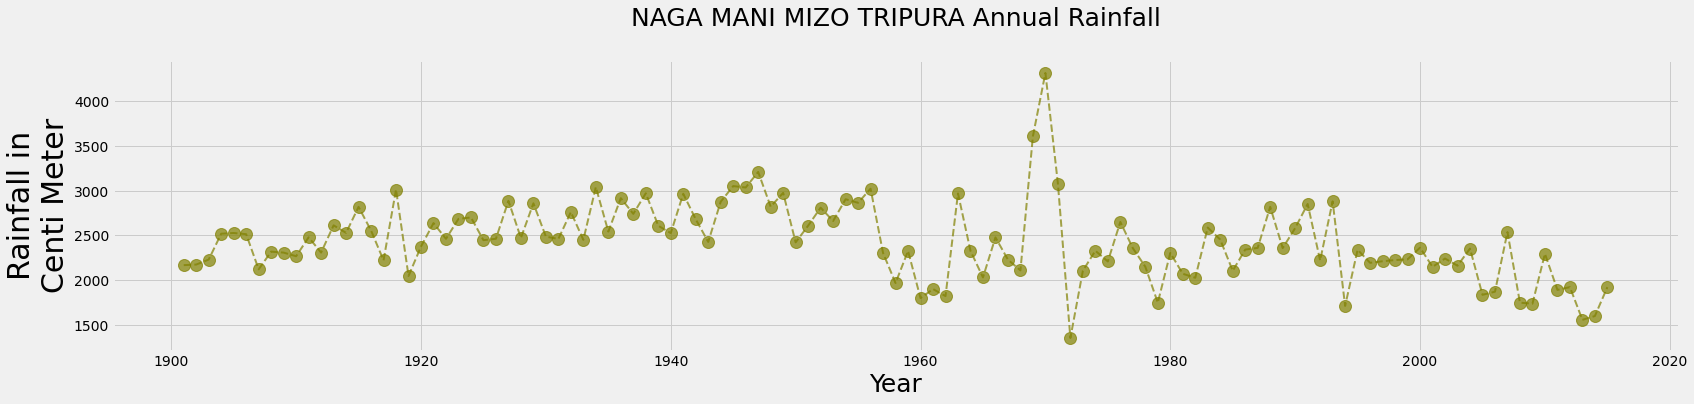

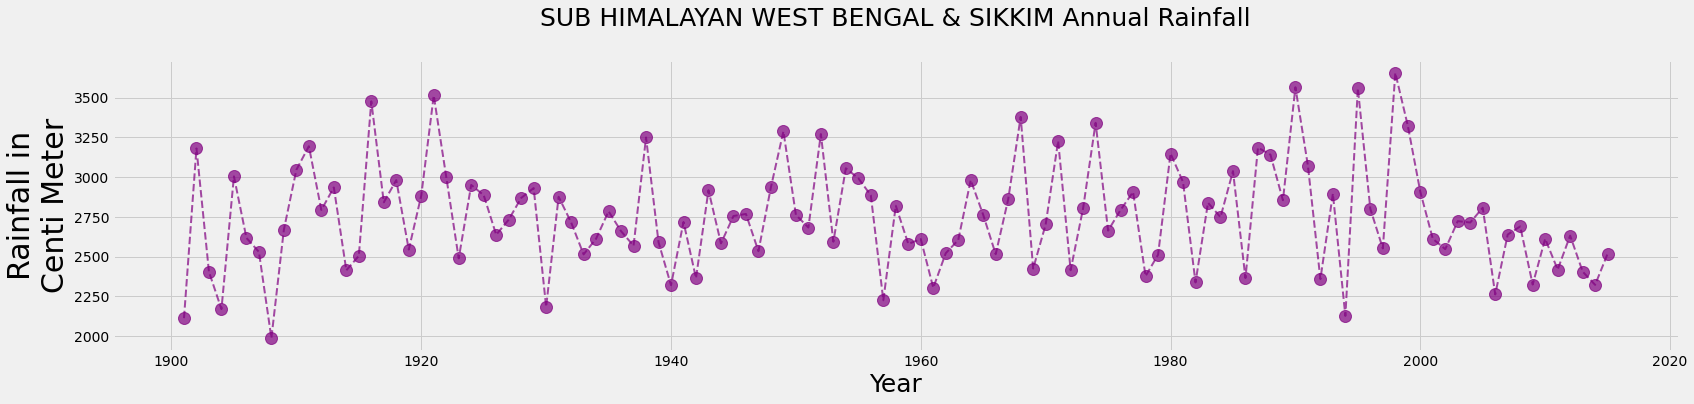

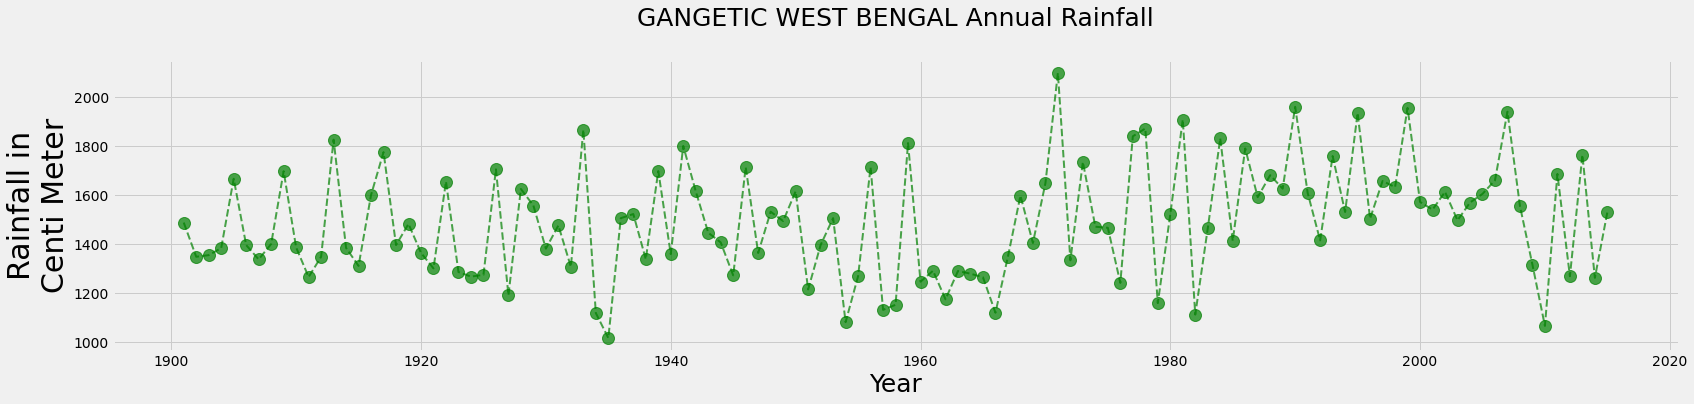

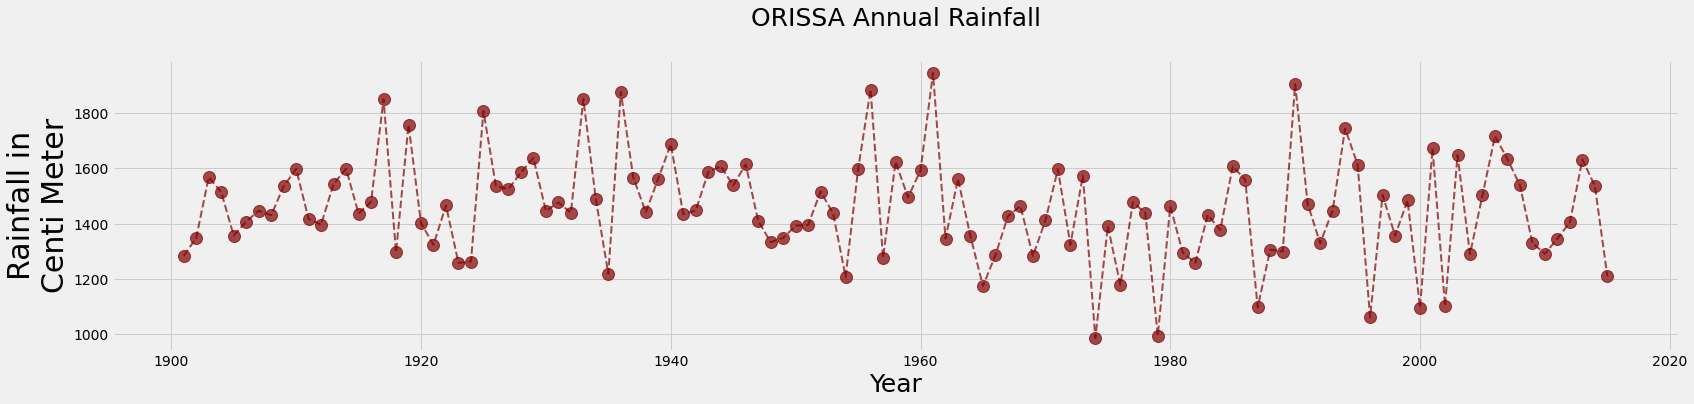

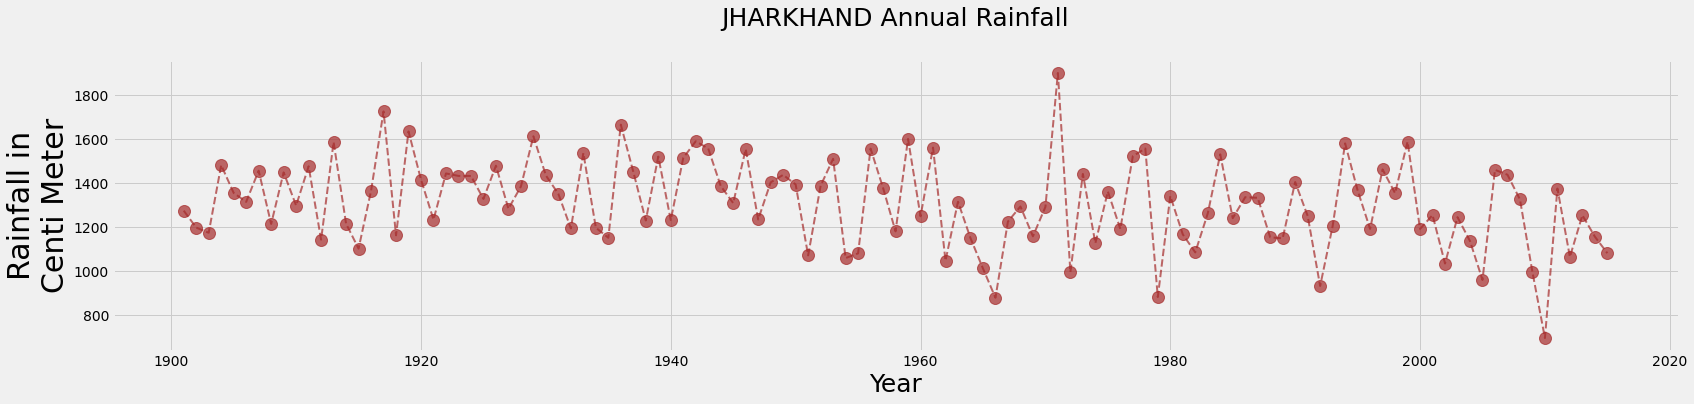

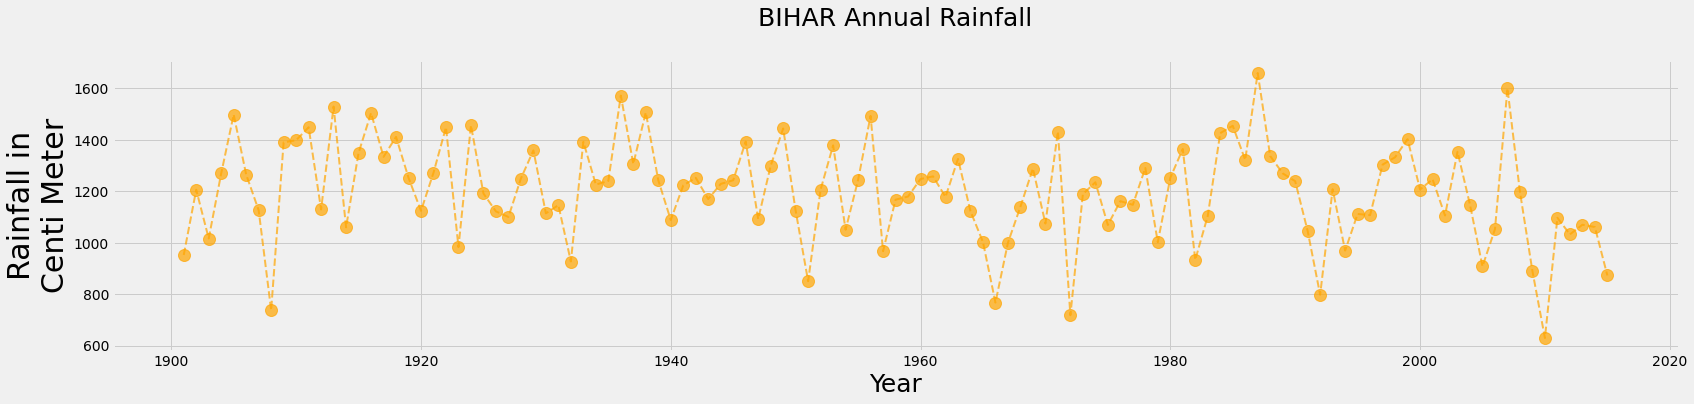

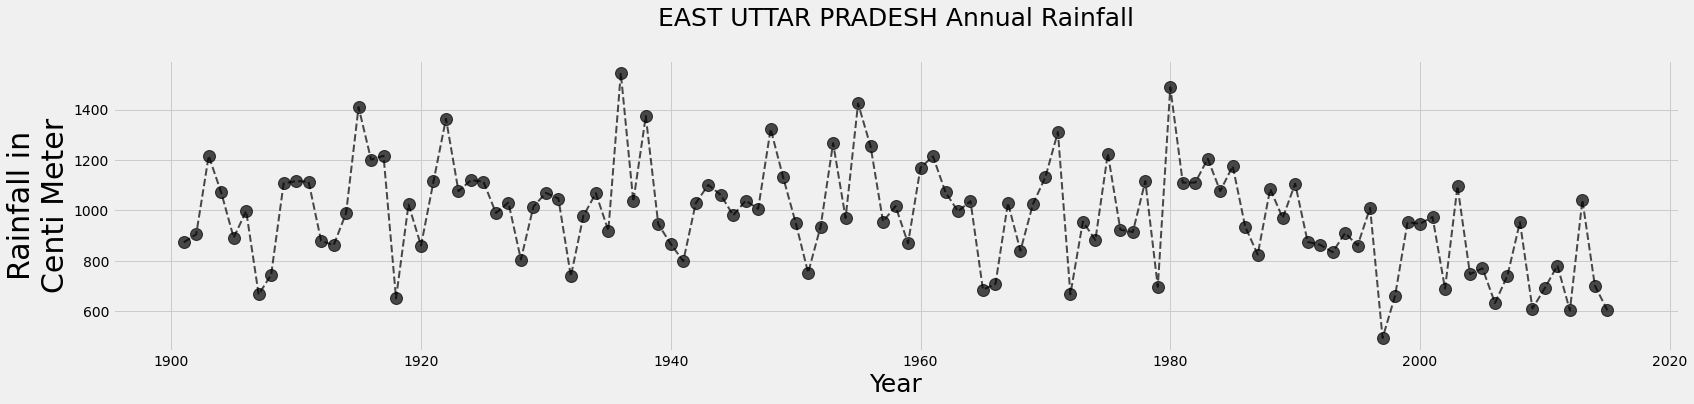

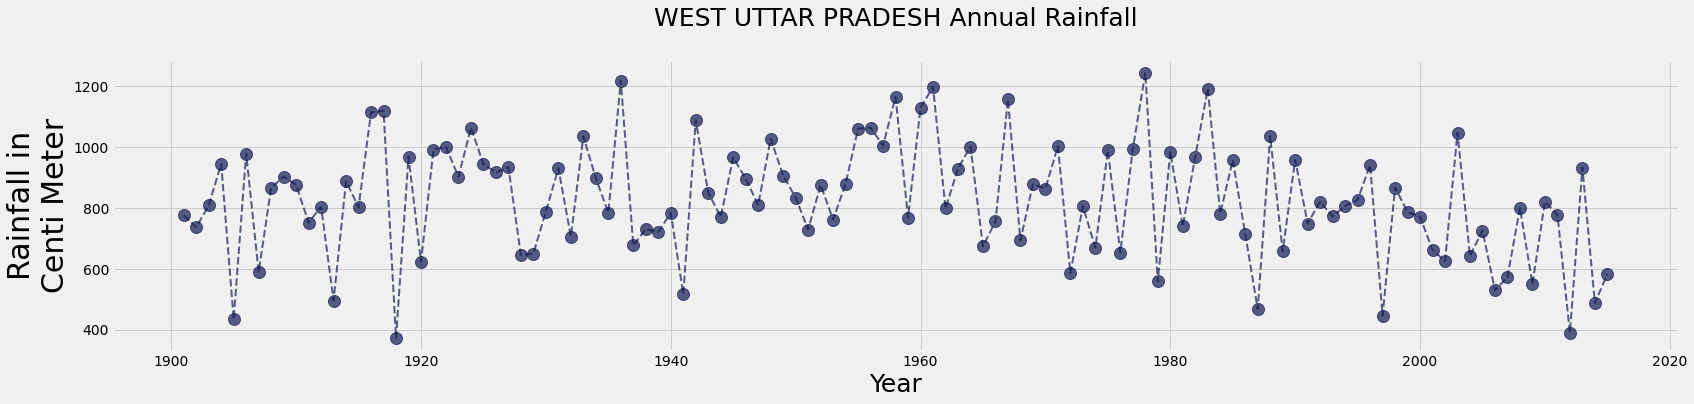

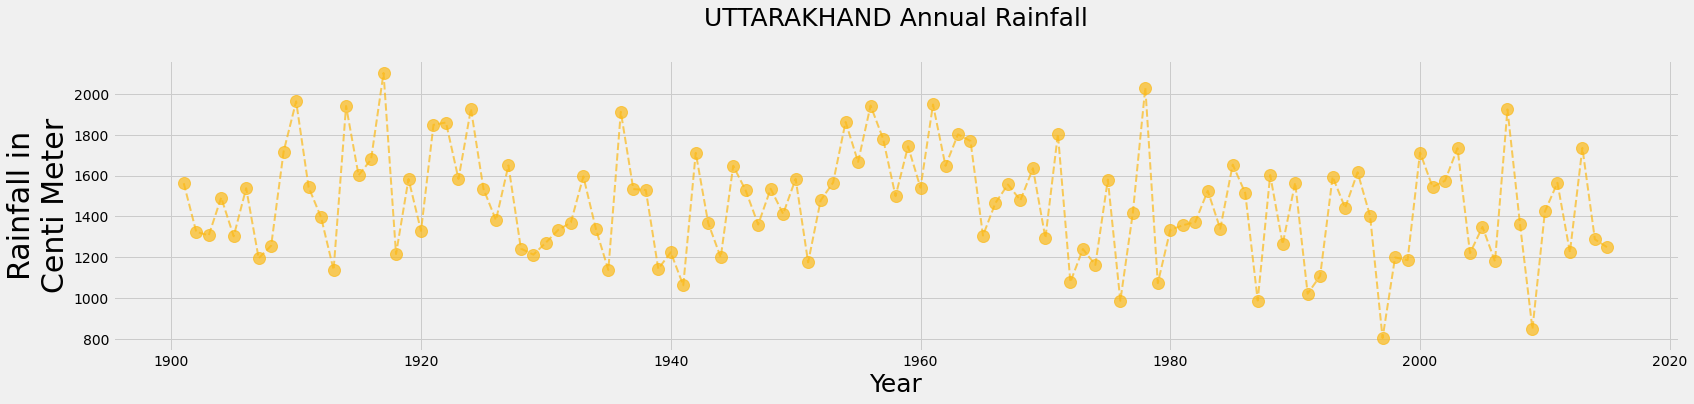

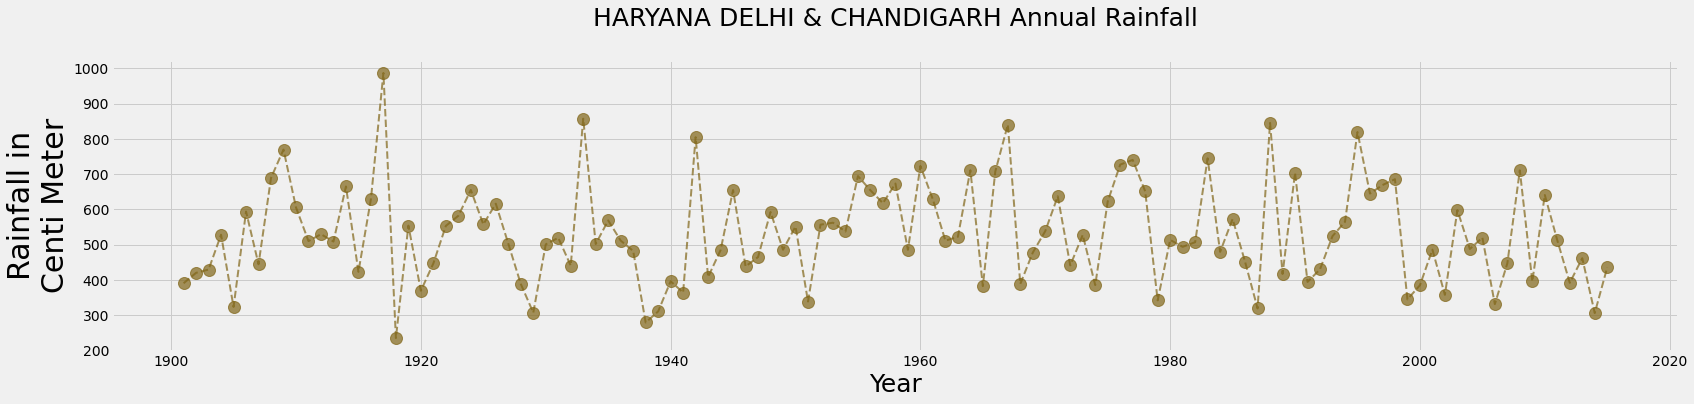

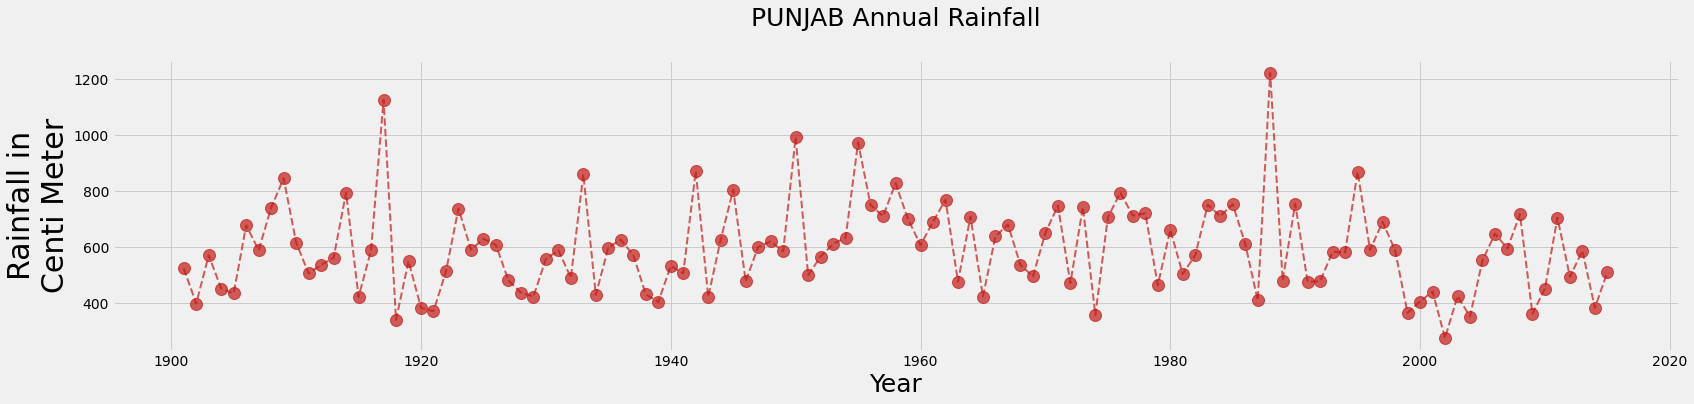

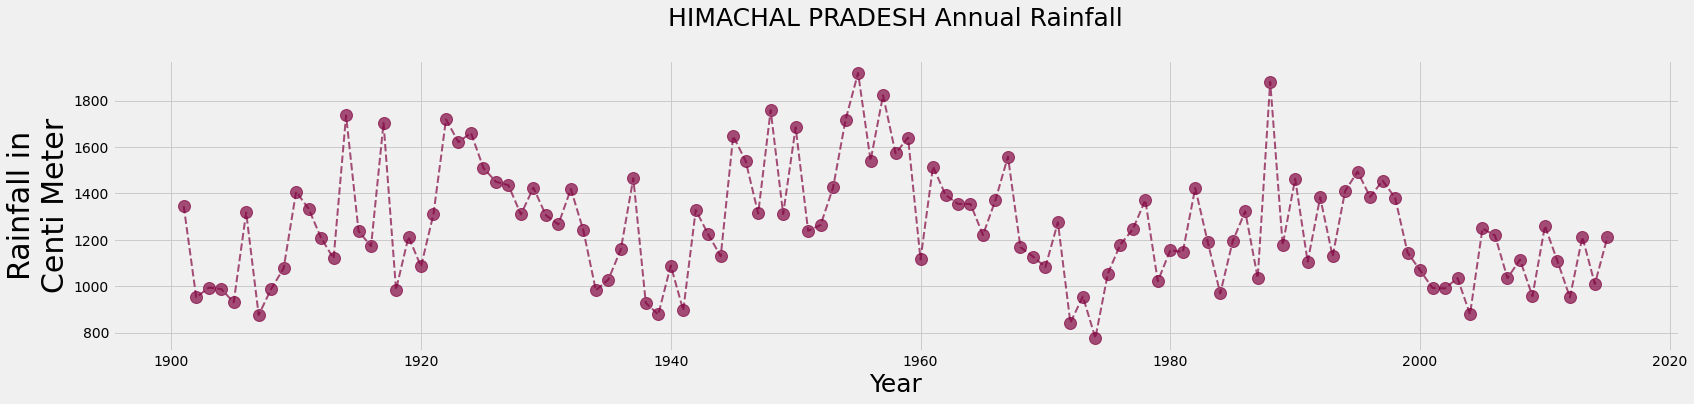

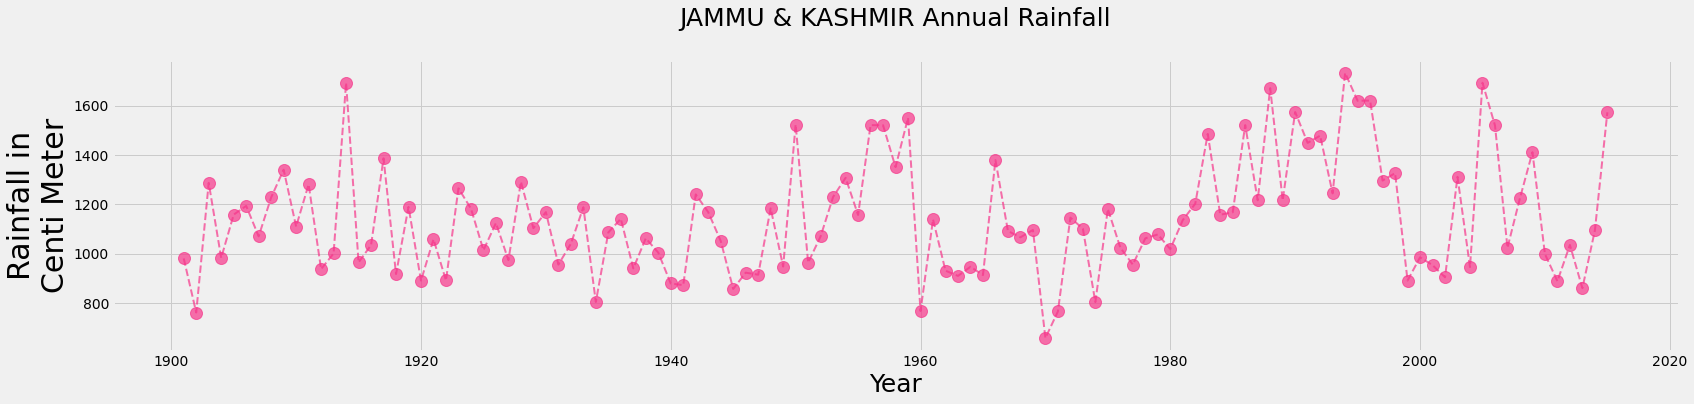

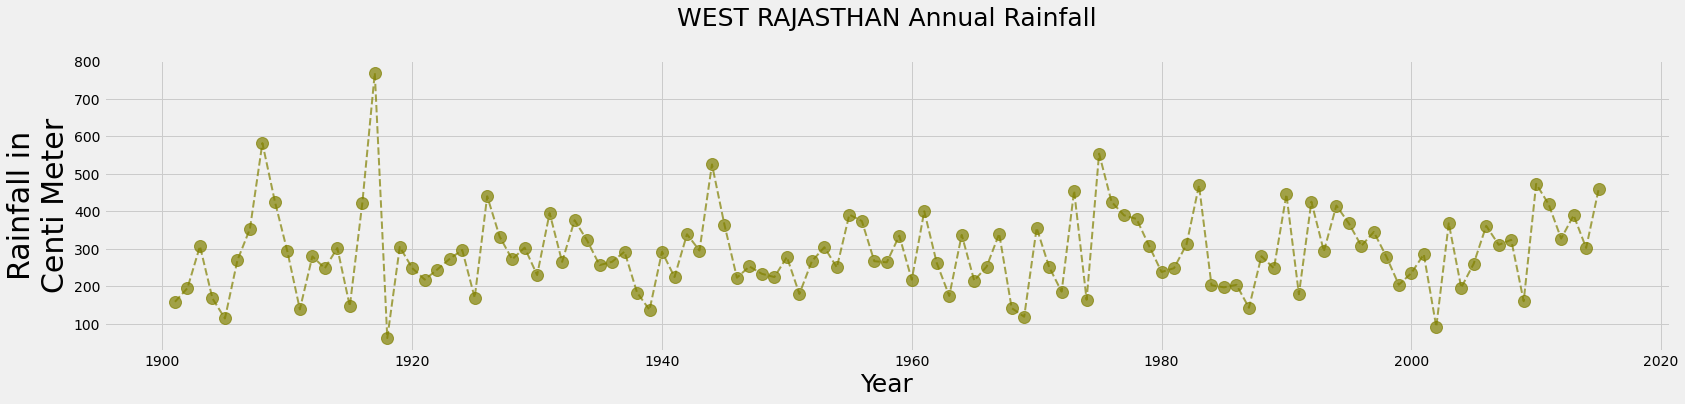

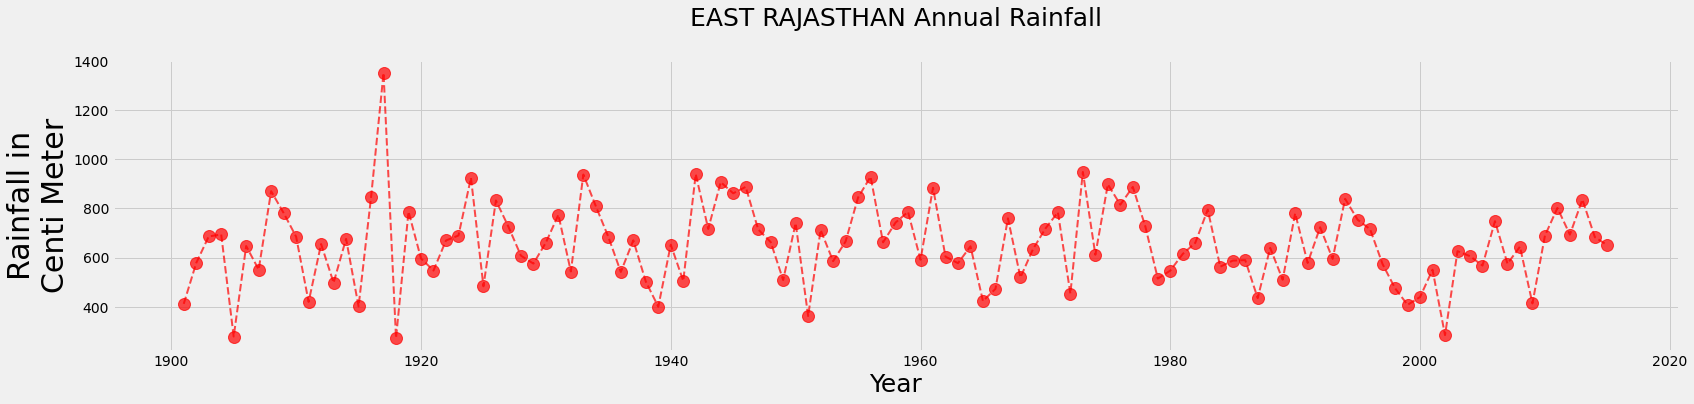

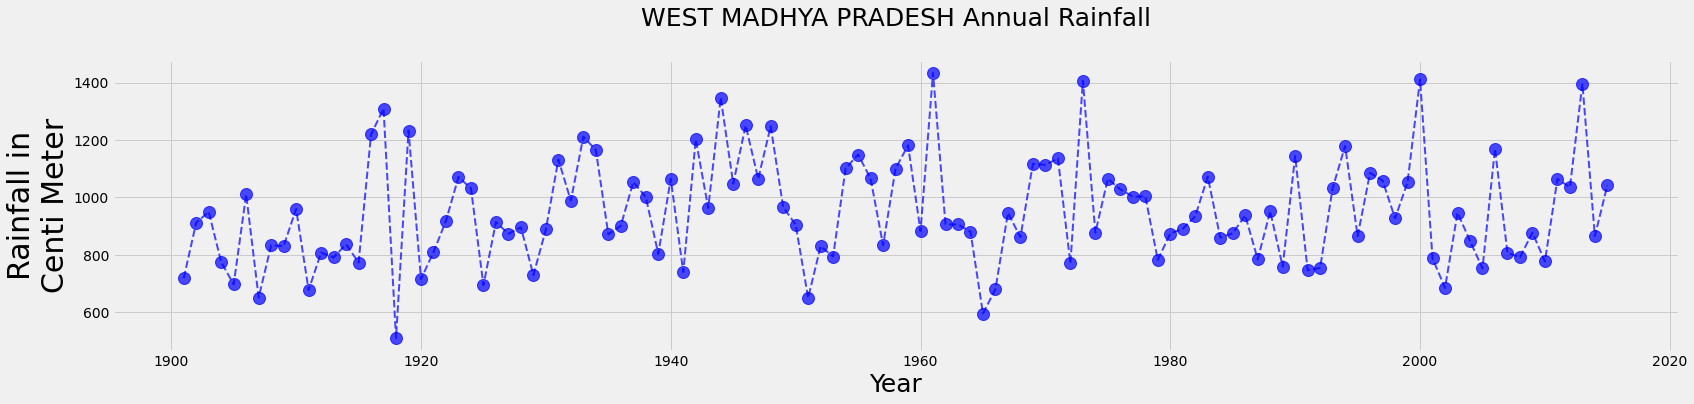

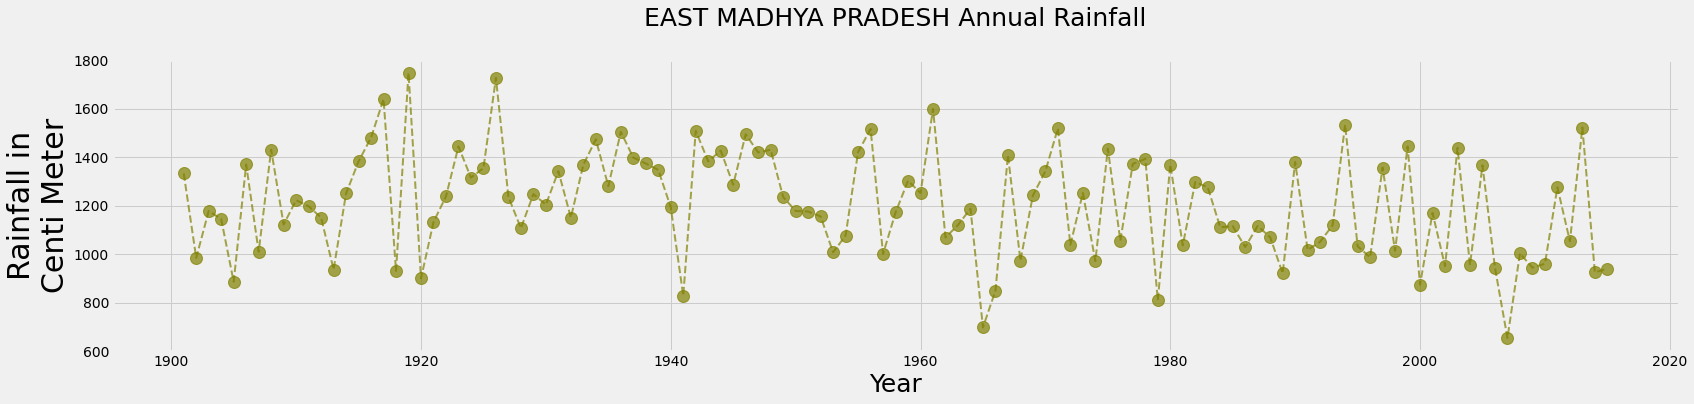

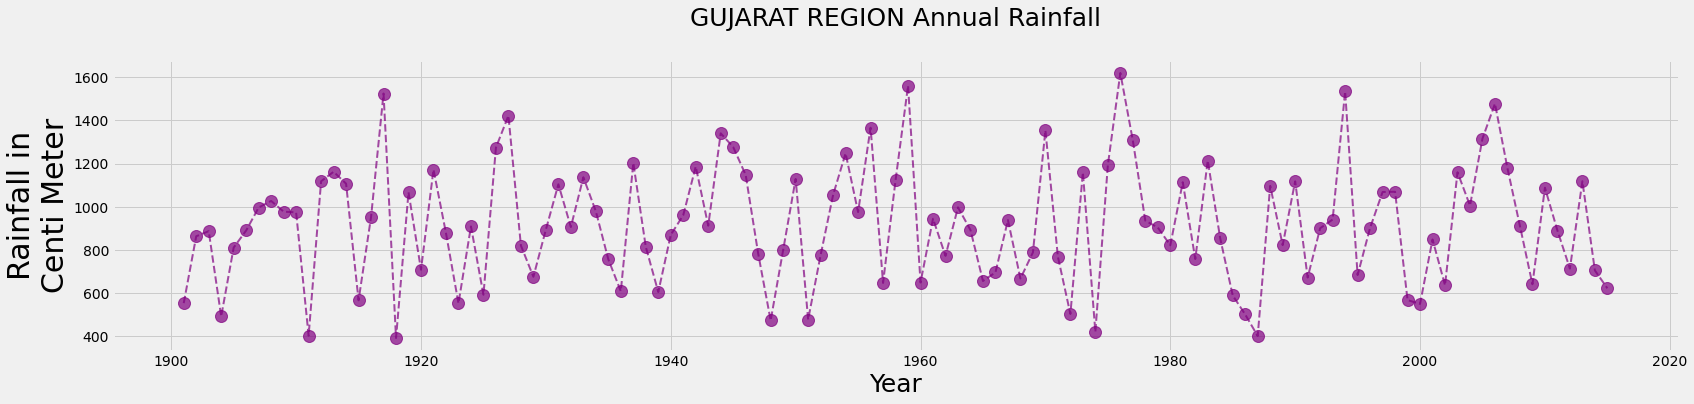

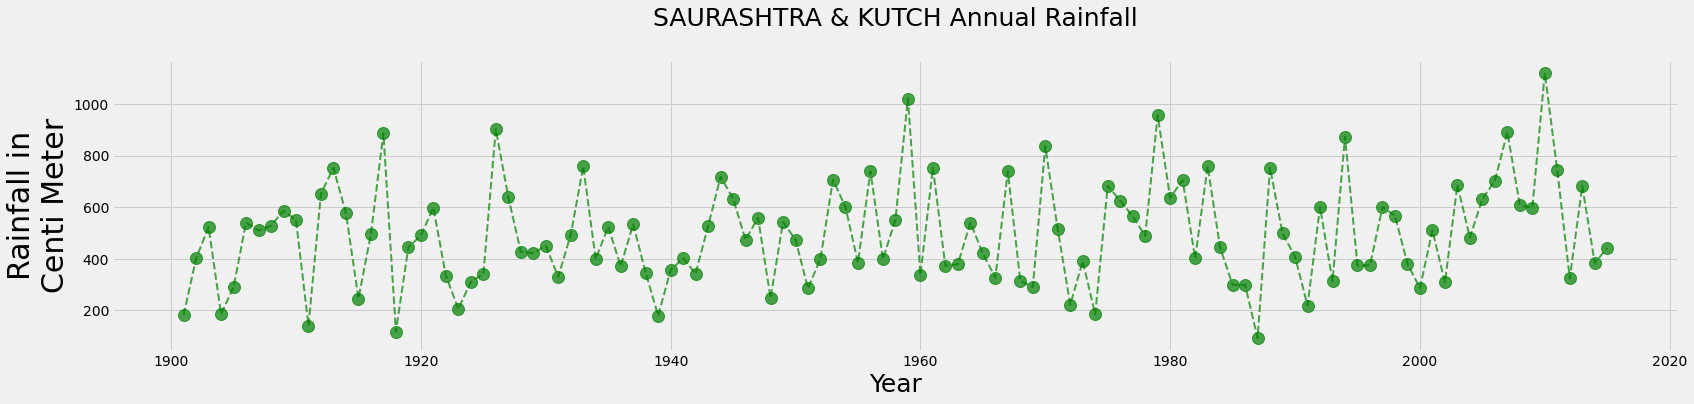

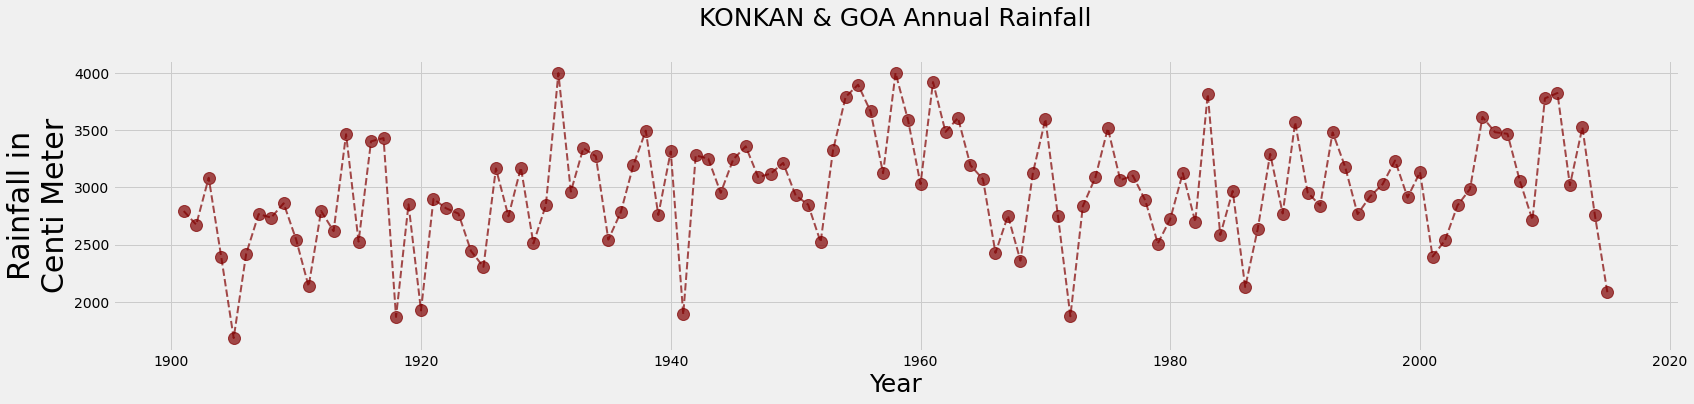

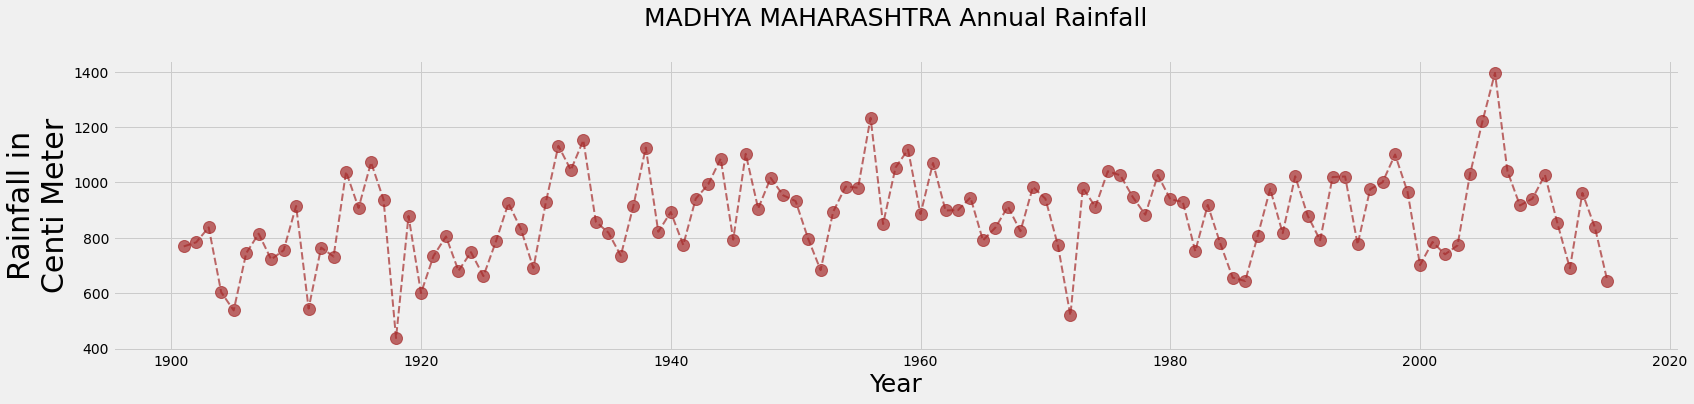

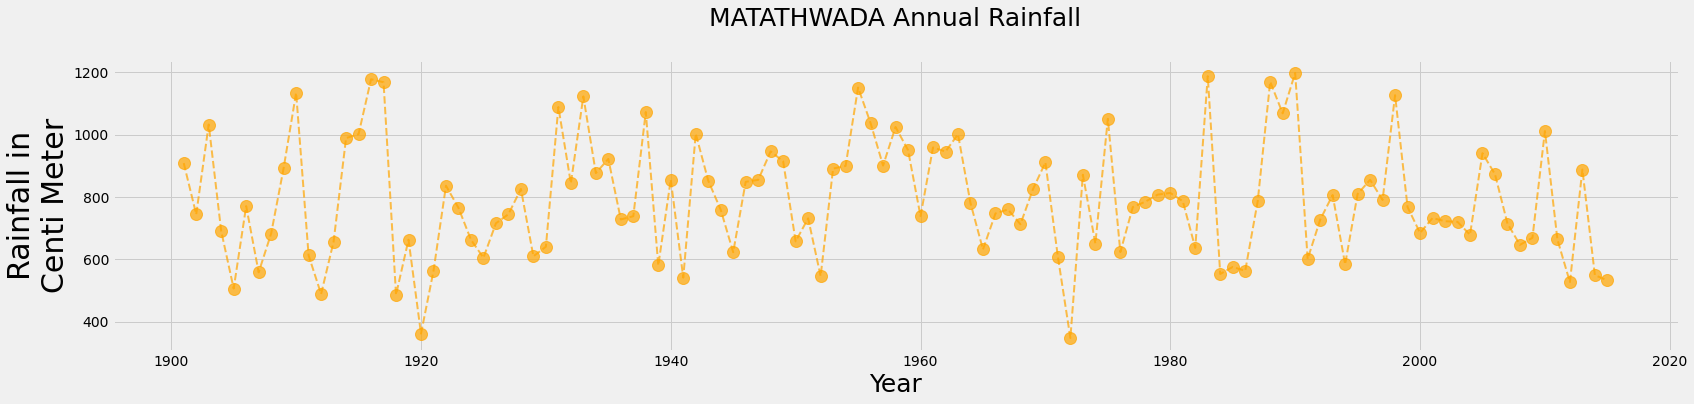

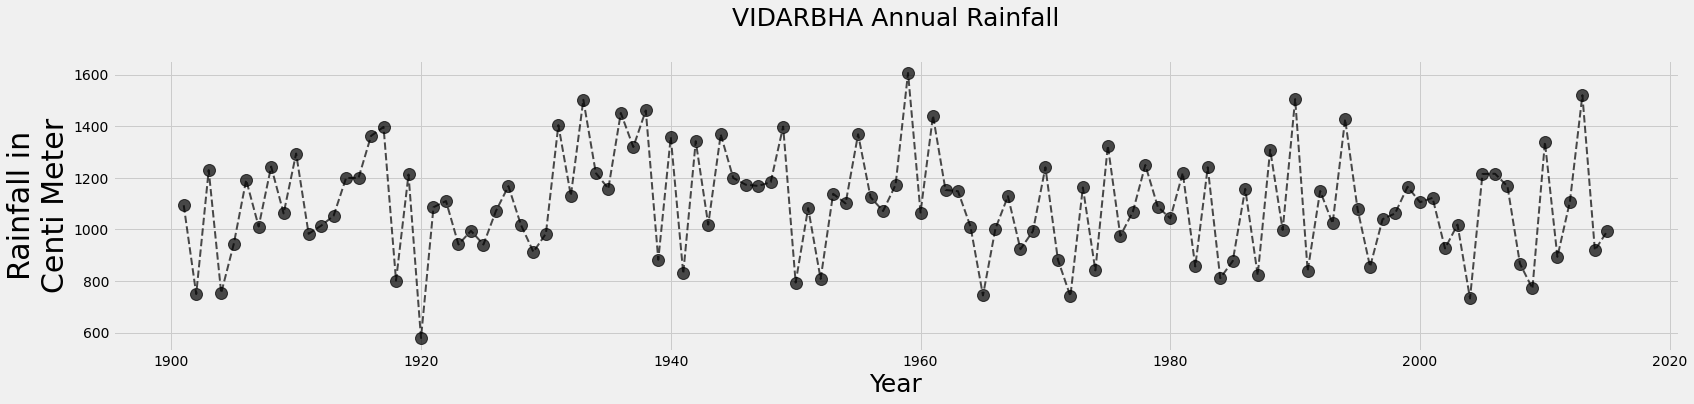

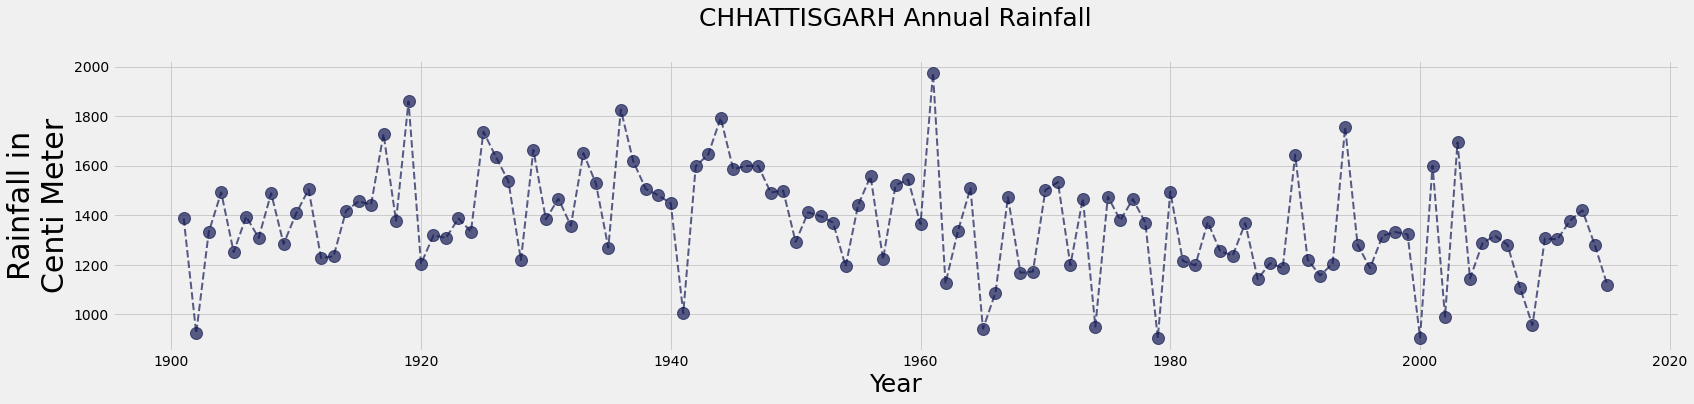

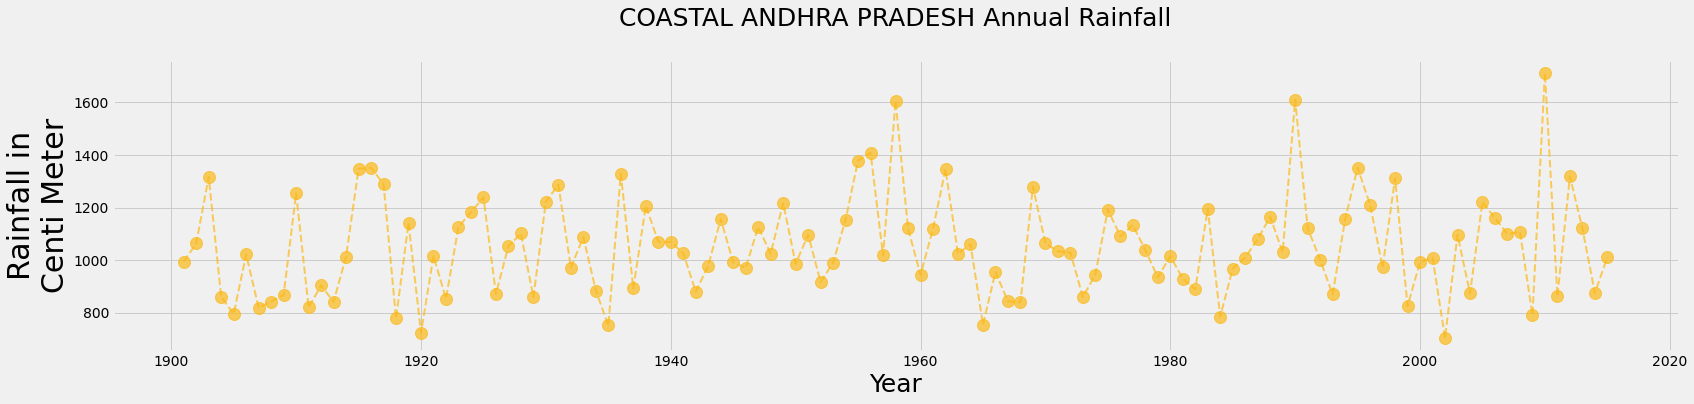

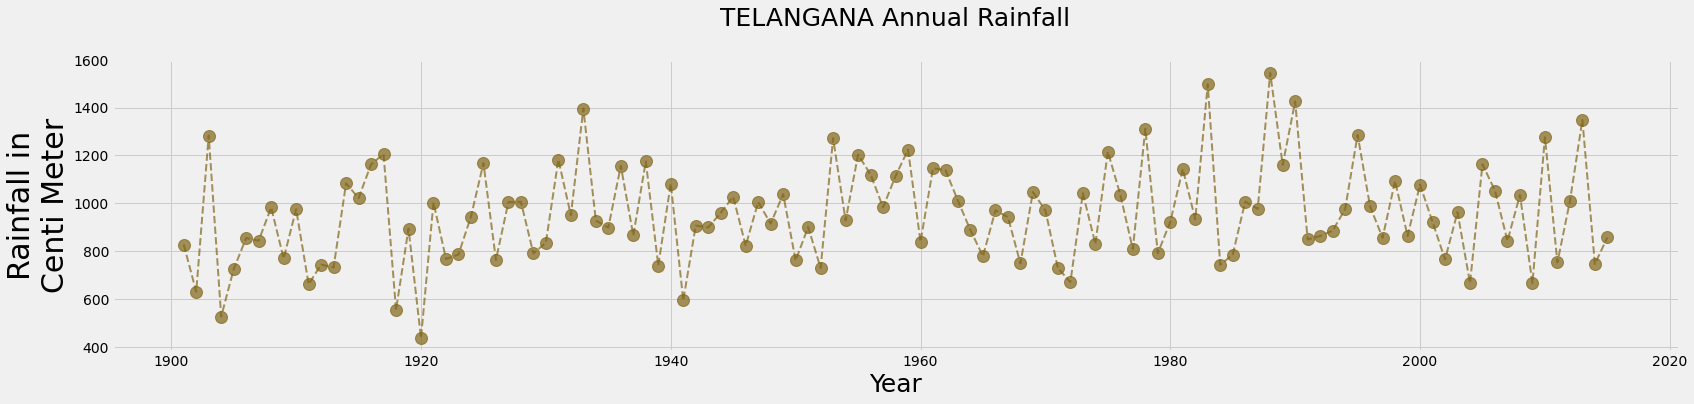

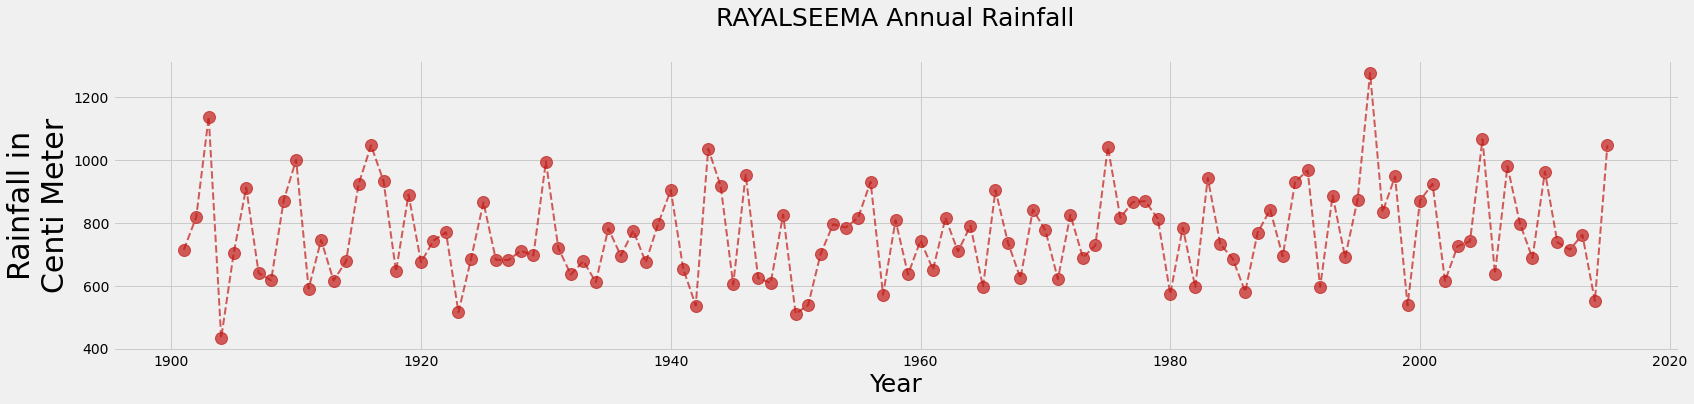

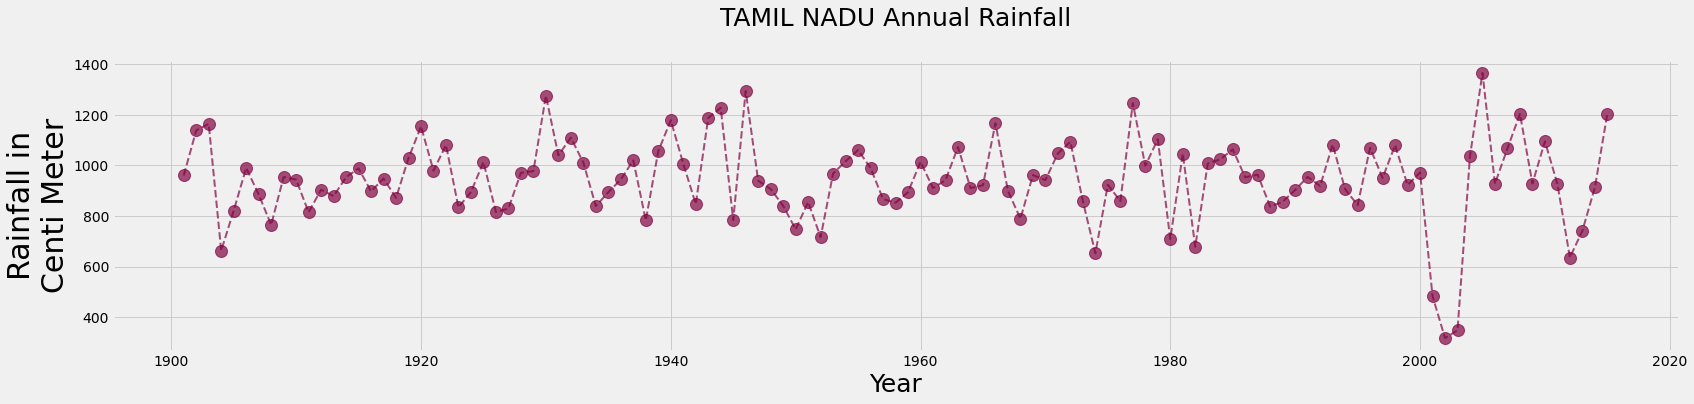

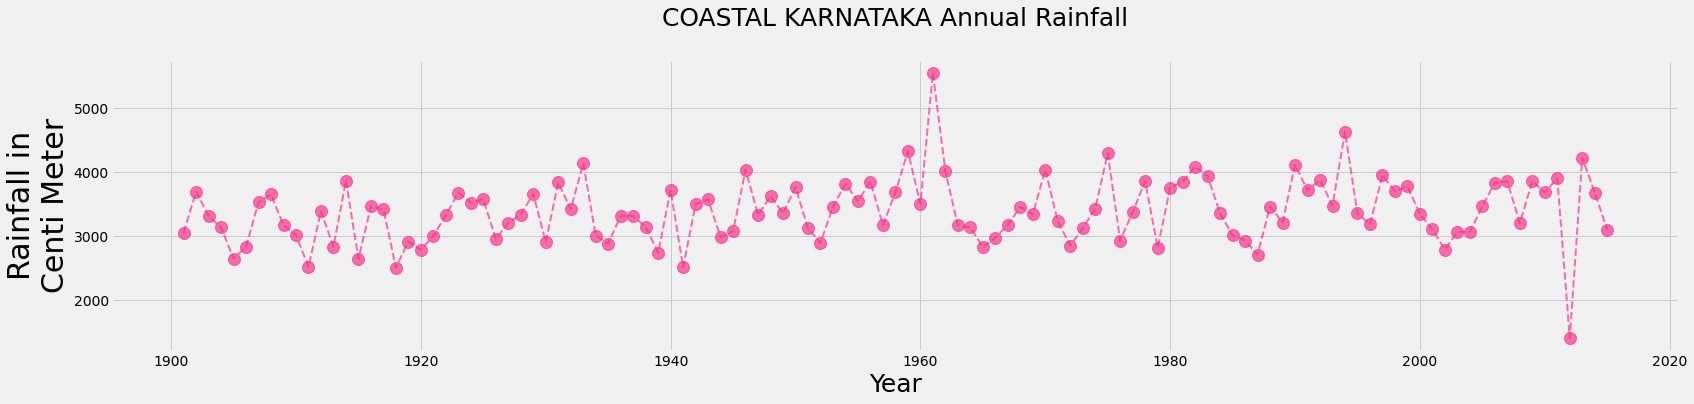

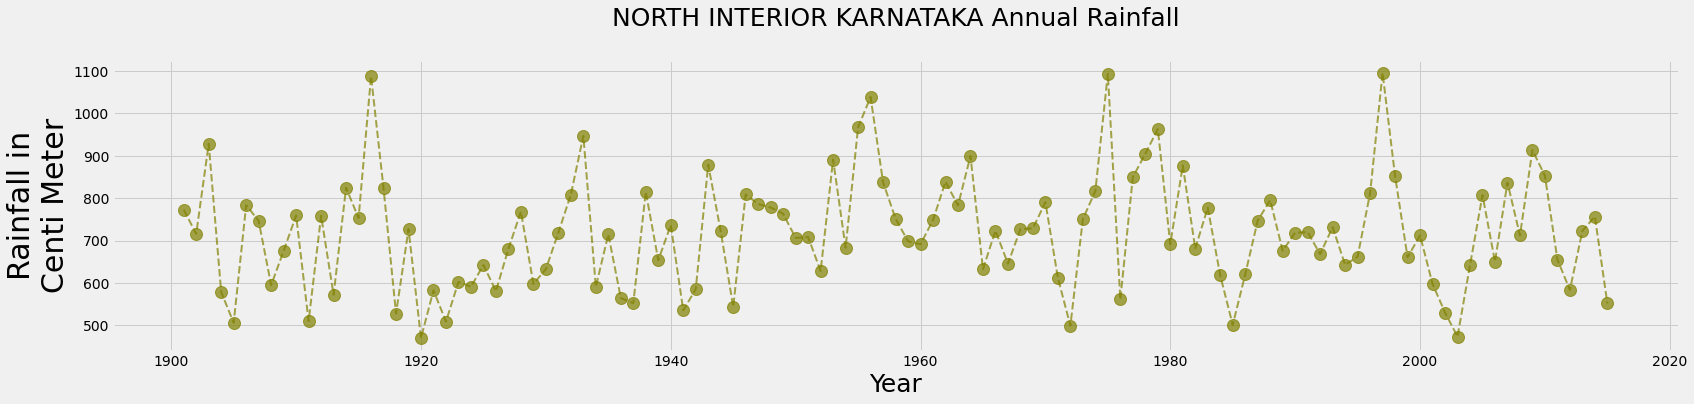

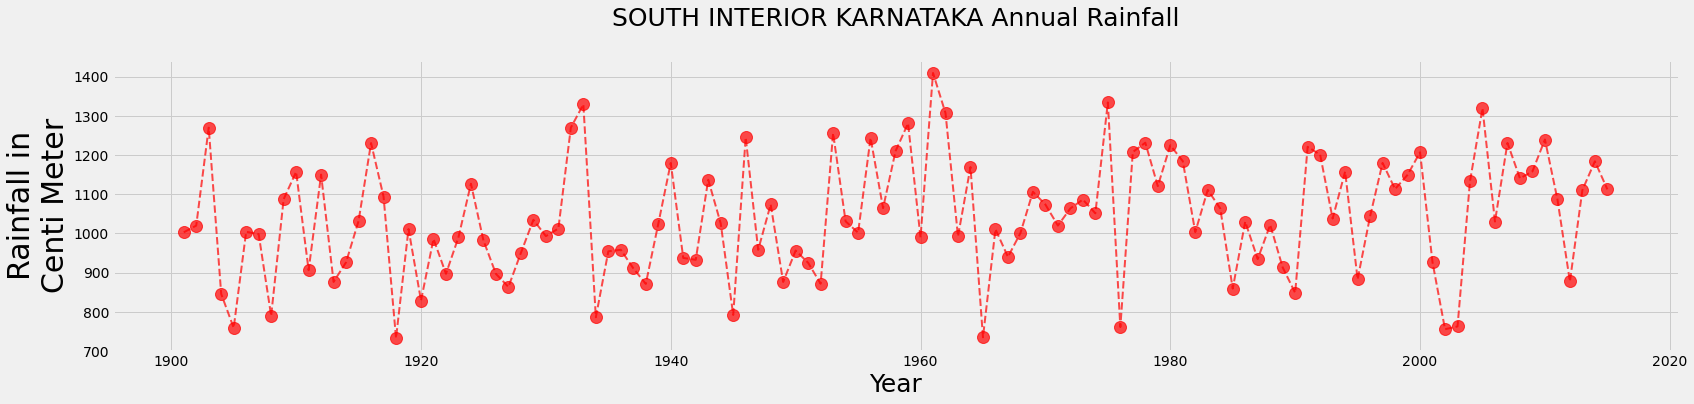

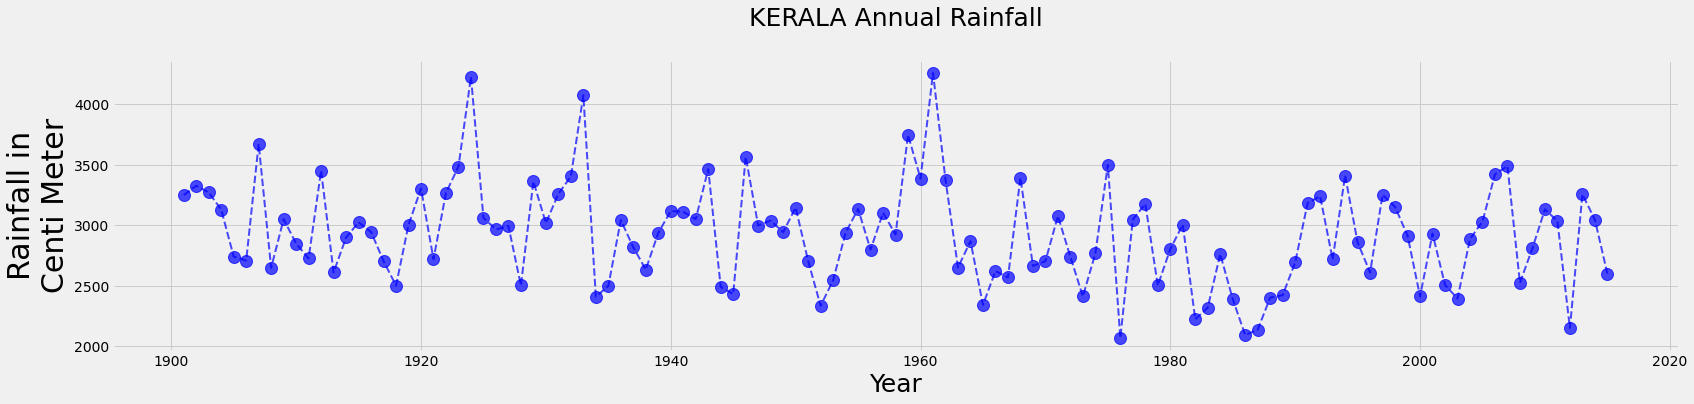

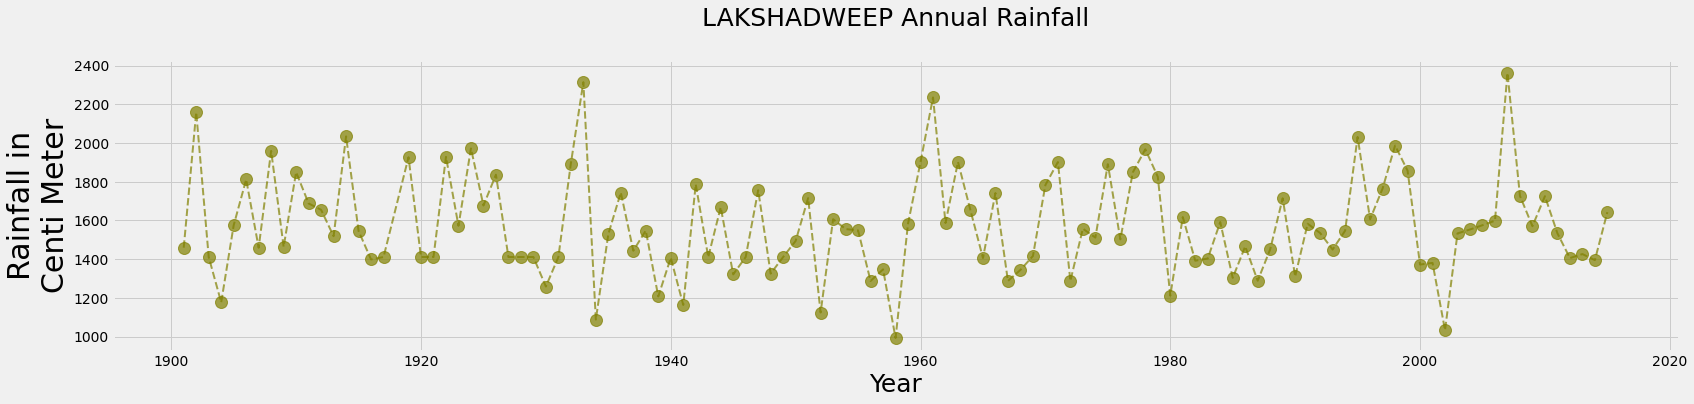

In [ ]:
def _SUBDIVISION(column,division):
        Year = []
        annual = []
        for i in range(len(column)):
            if column[i] == division:
                if 'nan'!= str(Input_Data["ANNUAL"][i]) and 'NAN' != str(Input_Data["ANNUAL"][i]):
                    Year.append(Input_Data["YEAR"][i])
                    annual.append((Input_Data["ANNUAL"][i]))
        return Year,annual
colors = ["#808000","#FF0000","#0000FF","#808000","#800080","#008000","#800000","#A52A2A","#FFA500","#000000","#151B54","#FBB917","#806517","#C11B17",
          "#810541","#F6358A","#808000","#FF0000","#0000FF","#808000","#800080","#008000","#800000","#A52A2A","#FFA500","#000000","#151B54","#FBB917",
          "#806517","#C11B17","#810541","#F6358A","#808000","#FF0000","#0000FF","#808000"]
country = Input_Data["SUBDIVISION"].unique()
for i in range(len(country)):
    Year, annual = _SUBDIVISION(Input_Data["SUBDIVISION"],str(country[i]))
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize']=(25,5)
    plt.plot(Year, annual, color=colors[i] ,alpha = 0.7, marker='o', linestyle='dashed',linewidth=2, markersize=12)
    plt.title(str(country[i])+" Annual Rainfall\n", size= 25)
    plt.xlabel("Year", size= 25)
    plt.ylabel("Rainfall in\nCenti Meter", size= 30)
    plt.show()
    

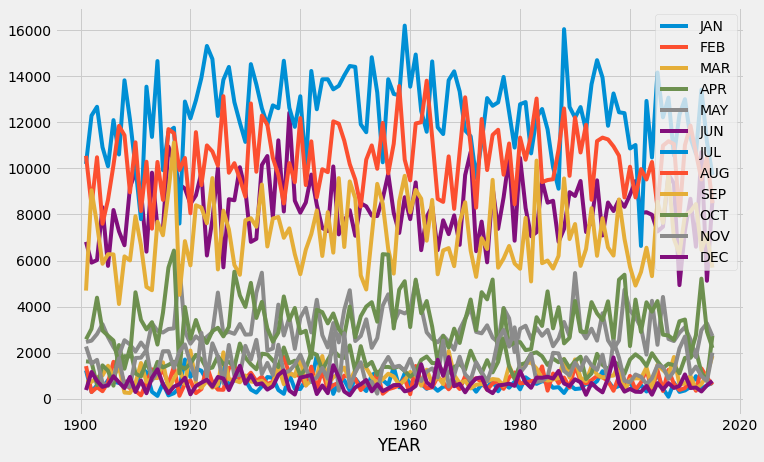

In [ ]:
Input_Data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(11,7));


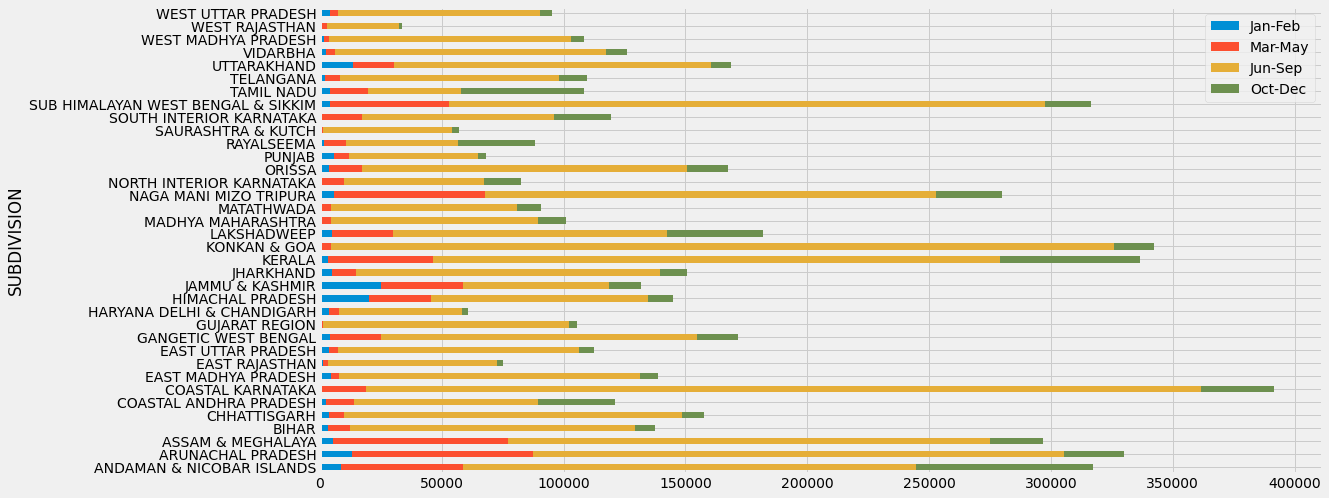

In [ ]:
Input_Data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

In [ ]:
#PREDICTION
#For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month. For all the experiments we used 80:20 training and test ratio. Linear regression SVR Artificial neural nets

#Testing metrics: We used Mean absolute error to train the models. We also shown the amount of rainfall actually and predicted with the histogram plots. We did two types of trainings once training on complete dataset and other with training with only ORISSA data All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
division_data = np.asarray(Input_Data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
temp = Input_Data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[Input_Data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)

In [ ]:
#terst 2015
temp = Input_Data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[Input_Data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [ ]:
temp = Input_Data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[Input_Data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

In [ ]:
# LINEAR MODEL
#Linear model is used in different ways according to the context. The most common occurrence is in connection with regression models and the term is often taken as synonymous with linear regression model. However, the term is also used in time series analysis with a different meaning. In each case, the designation "linear" is used to identify a subclass of models for which substantial reduction in the complexity of the related statistical theory is possible.

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# print (mean_absolute_error(y_test, y_pred))

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


In [ ]:
#SUPPORT VECTOR
#Support Vector Machine
#Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification and regression challenges. We plot each data item as a point in n-dimensional space (where n is number of features) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. A Support Vector Machine models the situation by creating a feature space, which is a finite-dimensional vector space, each dimension of which represents a "feature" of a particular object. The goal of the SVM is to train a model that assigns new unseen objects into a particular category. It achieves this by creating a linear partition of the feature space into two categories. Based on the features in the new unseen objects, it places an object "above" or "below" the separation plane, leading to a categorization. It is non-probabilistic, because the features in the new objects fully determine its location in feature space and there is no stochastic element involved. A subset of training data lies on Biased and Unbiased Hyper planes

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

126.13685895963154


In [ ]:
#NEURAL NETS :A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


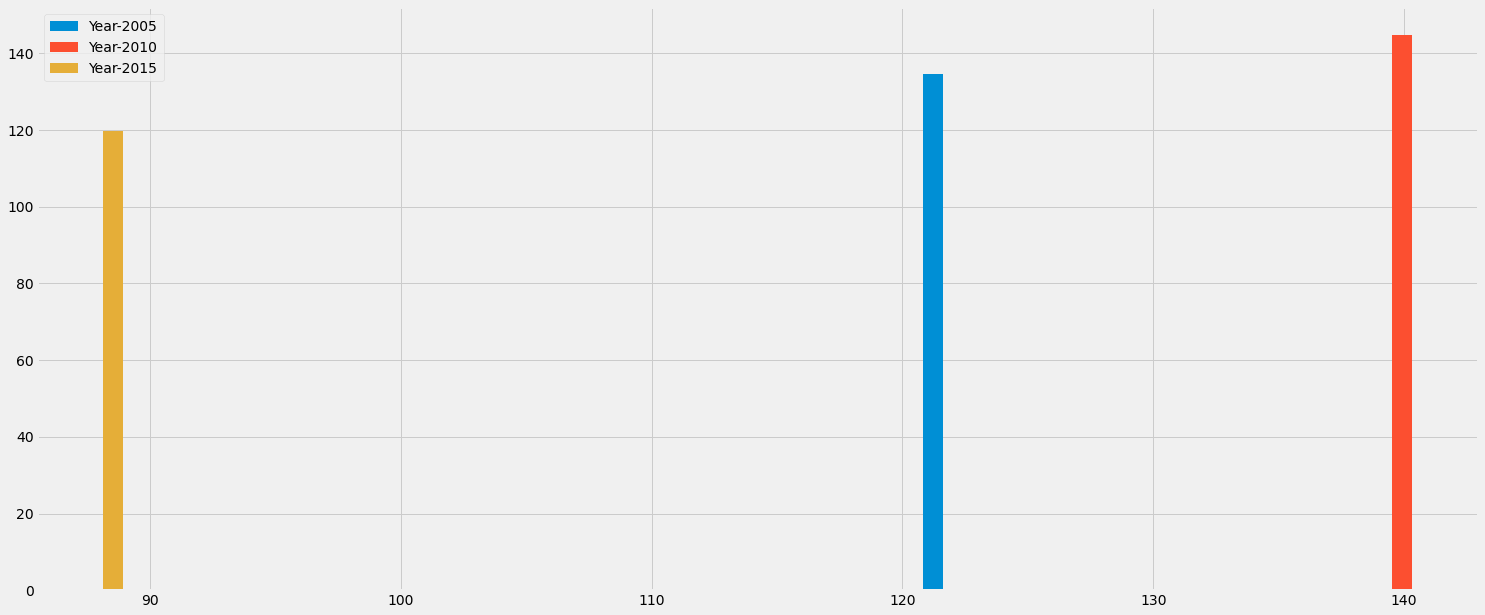

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")

plt.legend()
plt.show()

In [ ]:
#CONCLUSION :Various visualizations of data are observed which helps in implementing the approaches for prediction. Prediction of amount of rainfall for both the types of dataset. Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.